# Self-Drive Cars' Sentiment Analysis

- Descrptive analysis of tweets
- Time series analysis
- Company labels
- And saving files for further process



In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import spacy 

nlp = spacy.load("en_core_web_sm") # preload model

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1)-Loading data

In [5]:
filename='tweets.csv'

In [6]:
df = pd.read_csv(filename, delimiter='\t', header=None,names=['TWEET ID','TIMESTAMP','UTC DATE','USER ID','SCREEN NAME','NAME','Q','TEXT'])

In [7]:
df_label=df[['TEXT','UTC DATE']]

### Loading saved csv file

In [8]:
filename='entity_data.csv'

In [9]:
data=pd.read_csv('entity_data.csv')
data.shape

(455728, 2)

In [10]:
# for quick code writing
l=data

In [11]:
l.head()

,TEXT,UTC DATE
0,TEXT,UTC DATE
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25


### remove extra row

In [12]:
l=l.drop(l.index[0])

In [13]:
l.head()

,TEXT,UTC DATE
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25
5,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15


In [14]:
l.tail()

,TEXT,UTC DATE
455723,Vote for my friend's cool as heck #VW Dresser....,2016-06-16 00:03:20
455724,Listen to @MarenMorris' '80’s Mercedes” and @c...,2016-06-16 00:01:58
455725,"On selling a company, Susan Daimler, A&S '99, ...",2016-06-16 00:00:33
455726,Time to Turn Heads with this Sunflower Matte M...,2016-06-16 00:00:08
455727,.@BMW sub-brand Zinoro will launch its plug-in...,2016-06-16 00:00:01


### Save data

In [15]:
import pickle
df_label.to_pickle('entity_data.pkl')
df_label.to_csv('entity_data.csv',index=False)

# 2)- Time Series 

**convert this datatime to month or year **

In [16]:
date=l['UTC DATE']

In [17]:
dtype(date)

dtype('O')

It's an object. We need to convert into datetime object

In [18]:
l['UTC DATE']=pd.to_datetime(date)

In [19]:
l['UTC DATE'].dt.month[:5]

1    7
2    7
3    7
4    7
5    7
Name: UTC DATE, dtype: int64

In [20]:
l['month']=l['UTC DATE'].dt.month

In [21]:
l['year']=l['UTC DATE'].dt.year

In [22]:
len(l[l['UTC DATE'].dt.year==2016])

169956

In [23]:
len(l[l['UTC DATE'].dt.year==2017])

144670

In [24]:
len(l[l['UTC DATE'].dt.year==2018])

140800

In [25]:
len(l[l['UTC DATE'].dt.year==2019])

301

In [26]:
l[l['UTC DATE'].dt.year==2019]

,TEXT,UTC DATE,month,year
20184,The future of self-driving taxis may be closer...,2019-01-01 23:48:00,1,2019
20185,Uber has resumed testing self-driving vehicles...,2019-01-01 03:45:00,1,2019
20186,This self-driving car is more than a self-driv...,2019-01-01 19:00:00,1,2019
20187,People are slashing tires on self-driving vehi...,2019-01-01 05:56:05,1,2019
20188,"At the begining of revolutionary 2019 year, I ...",2019-01-01 23:02:02,1,2019
...,...,...,...,...
310952,@Aaron_Torres @StinkinGenius1 New Year's Chec...,2019-01-01 05:20:15,1,2019
310953,It's almost the 100th anniversary of when Edse...,2019-01-01 03:36:19,1,2019
310954,Our Next Event SweetHeart 2019 411 Motor Spe...,2019-01-01 00:28:29,1,2019
310955,"Mike Mayock: He is a fast get-off, high motor ...",2019-01-01 00:22:53,1,2019


We have data from 16.06.2016-01.01.2019

### Plot by year

In [27]:
l.groupby(l.year).size()

year
2016    169956
2017    144670
2018    140800
2019       301
dtype: int64

In [28]:
# or
l.year.value_counts().sort_index()

2016    169956
2017    144670
2018    140800
2019       301
Name: year, dtype: int64

In [29]:
# For checking distribution of patent over years
dist=l.year.value_counts(ascending=True).sort_index()

In [30]:
type(dist)

pandas.core.series.Series

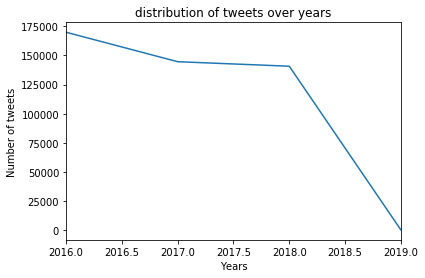

In [31]:
dist.plot()
plt.xlabel('Years')
plt.ylabel('Number of tweets')
plt.title('distribution of tweets over years')
#plt.legend()
plt.show()

### Distribution over months

In [32]:
dist_month=l.month.value_counts(ascending=True).sort_index()

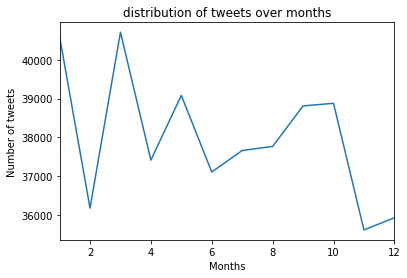

In [33]:
dist_month.plot()
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('distribution of tweets over months')
#plt.legend()
plt.show()

### using plotly

In [34]:
import plotly
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go

In [35]:
value=l.year.value_counts().sort_index()

In [36]:
value_df=pd.DataFrame(data=value)
value_df

,year
2016,169956
2017,144670
2018,140800
2019,301


In [37]:
pyo.plot([{
    'x' : value_df.index,
    'y' : value_df[col],
    'name' : col
  

}for col in value_df.columns],filename='distribution.html')

'distribution.html'

In [38]:
traces=[go.Scatter(
    x=value_df.index,
    y=value_df[col],
    name= col



)for col in value_df.columns]

In [39]:
data=traces

In [40]:
layout=go.Layout(
title="Tweets' distribution over the year",
xaxis=dict(title='Number of years'),
yaxis=dict(title='Number of Tweets'),
hovermode='closest' # for bringing values of points together as x and y
)

In [41]:
figure1= go.Figure(data=data, layout=layout)

In [42]:
pyo.plot(figure1,filename='distribution2.html')

'distribution2.html'

# 3)- Getting organization names

### 3.1)- Start with Google

#### Experiment

In [43]:
list_company = ['Google']

In [44]:
for company in list_company:
    l[company] = l.astype(str).sum(axis=1).str.contains(company)

In [45]:
l.head()

,TEXT,UTC DATE,month,year,Google
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,7,2018,False
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,7,2018,False
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,7,2018,False
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,7,2018,False
5,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,7,2018,False


In [46]:
l.Google.value_counts()

False    448640
True       7087
Name: Google, dtype: int64

In [47]:
len(l.loc[l.TEXT.str.contains('Google',na=False)])

7087

In [48]:
l.loc[l.TEXT.str.contains('Google',na=False)]

,TEXT,UTC DATE,month,year,Google
433,Self-driving taxis will take half of US drivin...,2018-10-14 00:34:15,10,2018,True
463,Companies outside of #tech have a key advantag...,2018-10-28 14:07:20,10,2018,True
913,"Must hold CNN, Apple, Google's feet 2 the fire...",2016-11-02 16:20:30,11,2016,True
1060,Soooo maybe Google is building its own self-dr...,2016-02-13 03:05:22,2,2016,True
1066,"Exclusive: In boost to self-driving cars, U.S....",2016-02-13 10:40:27,2,2016,True
...,...,...,...,...,...
453475,"Apple joins Tesla, Google, BMW, Ford, Honda an...",2017-04-19 00:01:01,4,2017,True
454174,"IBM is your dad, and Google is his younger bro...",2016-11-29 23:02:07,11,2016,True
454474,#SEO #entrepreneur Sell #1PH #electric #motors...,2016-03-15 17:06:06,3,2016,True
454499,"Interesting to me that Google, Lyft, General M...",2016-03-15 20:02:13,3,2016,True


#### Experiment round 2

To add 1 and 0

In [49]:
l['google'] = l['TEXT'].str.contains('Google', case=False).astype(int)

In [50]:
l.head()

,TEXT,UTC DATE,month,year,Google,google
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,7,2018,False,0
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,7,2018,False,0
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,7,2018,False,0
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,7,2018,False,0
5,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,7,2018,False,0


In [51]:
l.google.value_counts()

0    446995
1      8732
Name: google, dtype: int64

##### converting int into name of company

### 3.2)- Tesla

In [52]:
l['tesla'] = l['TEXT'].str.contains('Tesla', case=False).astype(int)

In [53]:
l.tesla.value_counts()

0    433126
1     22601
Name: tesla, dtype: int64

### 3.3)-General Motors

In [54]:
l['gm'] = l['TEXT'].str.contains('General Motors', case=False).astype(int)

In [55]:
l.gm.value_counts()

0    424016
1     31711
Name: gm, dtype: int64

### 3.4)-Apple

In [56]:
l['apple'] = l['TEXT'].str.contains('Apple', case=False).astype(int)

In [57]:
l.apple.value_counts()

0    451228
1      4499
Name: apple, dtype: int64

### 3.5)-Ford

In [58]:
l['ford'] = l['TEXT'].str.contains('Ford', case=False).astype(int)

In [59]:
l.ford.value_counts()

0    437203
1     18524
Name: ford, dtype: int64

### 3.6)-Daimler-Benz

In [60]:
l['daimler-benz'] = l['TEXT'].str.contains('Daimler-Benz', case=False).astype(int)

In [61]:
l['daimler-benz'].value_counts()

0    455676
1        51
Name: daimler-benz, dtype: int64

### 3.7)-Volkswagen

In [62]:
l['volkswagen'] = l['TEXT'].str.contains('Volkswagen', case=False).astype(int)

In [63]:
l.volkswagen.value_counts()

0    437403
1     18324
Name: volkswagen, dtype: int64

### 3.8)-BMW

In [64]:
l['bmw'] = l['TEXT'].str.contains('BMW', case=False).astype(int)

In [65]:
l.bmw.value_counts()

0    384433
1     71294
Name: bmw, dtype: int64

### 3.9)-Audi

In [66]:
l['audi'] = l['TEXT'].str.contains('Audi', case=False).astype(int)

In [67]:
l.audi.value_counts()

0    409961
1     45766
Name: audi, dtype: int64

### 3.10)-Porsche

In [68]:
l['porsche'] = l['TEXT'].str.contains('Porsche', case=False).astype(int)

In [69]:
l.porsche.value_counts()

0    390480
1     65247
Name: porsche, dtype: int64

### 3.11)-Opel

In [70]:
l['opel'] = l['TEXT'].str.contains('Opel', case=False).astype(int)

In [71]:
l.opel.value_counts()

0    454787
1       940
Name: opel, dtype: int64

### 3.12)-Waymo

In [72]:
l['waymo'] = l['TEXT'].str.contains('Waymo', case=False).astype(int)

In [73]:
l.waymo.value_counts()

0    452115
1      3612
Name: waymo, dtype: int64

### 3.13)-Aptiv

In [74]:
l['aptiv'] = l['TEXT'].str.contains('Aptiv', case=False).astype(int)

In [75]:
l.aptiv.value_counts()

0    455477
1       250
Name: aptiv, dtype: int64

### 3.14)-Intel-Mobileye

In [76]:
l['intel'] = l['TEXT'].str.contains('Intel', case=False).astype(int)

In [77]:
l.intel.value_counts()

0    452285
1      3442
Name: intel, dtype: int64

### 3.15)-Baidu

In [78]:
l['baidu'] = l['TEXT'].str.contains('Baidu', case=False).astype(int)

In [79]:
l.baidu.value_counts()

0    455017
1       710
Name: baidu, dtype: int64

### 3.16)-Toyota

In [80]:
l['toyota'] = l['TEXT'].str.contains('Toyota', case=False).astype(int)

In [81]:
l.toyota.value_counts()

0    452657
1      3070
Name: toyota, dtype: int64

### 3.17)-Renault

In [82]:
l['renault'] = l['TEXT'].str.contains('Renault', case=False).astype(int)

In [83]:
l.renault.value_counts()

0    454800
1       927
Name: renault, dtype: int64

### 3.18)-Mitsubishi

In [84]:
l['mitsubishi'] = l['TEXT'].str.contains('Mitsubishi', case=False).astype(int)

In [85]:
l.mitsubishi.value_counts()

0    455529
1       198
Name: mitsubishi, dtype: int64

### 3.19)-Nissan

In [86]:
l['nissan'] = l['TEXT'].str.contains('Nissan', case=False).astype(int)

In [87]:
l.nissan.value_counts()

0    454087
1      1640
Name: nissan, dtype: int64

# 4)-Ploting data


Fig4: Number of tweets about key players

In [88]:
for col in l.columns:
    print( col, ':', len(l[col].unique()))

TEXT : 447442
UTC DATE : 450406
month : 12
year : 4
Google : 2
google : 2
tesla : 2
gm : 2
apple : 2
ford : 2
daimler-benz : 2
volkswagen : 2
bmw : 2
audi : 2
porsche : 2
opel : 2
waymo : 2
aptiv : 2
intel : 2
baidu : 2
toyota : 2
renault : 2
mitsubishi : 2
nissan : 2


In [89]:
companies={'Google', 'Tesla','GM','Apple','Ford','Daimler-Benz','Volkswagen','BMW','Audi','Porsche','Opel','Waymo','Aptiv','Intel-MobileEye','Baidu','Toyota','Renault-Mitsubishi-Nissan'}

In [90]:
tweets=[8732,22601,31711,4499,18524,51,18324,71294,45766,65247,940,3612,3442,250,710,3070,927,198,1640]

In [91]:
df_plot = pd.DataFrame({'comp': ['Google', 'Tesla','GM','Apple','Ford','Daimler-Benz','Volkswagen','BMW','Audi','Porsche','Opel','Waymo','Aptiv','Intel-MobileEye','Baidu','Toyota','Renault-Mitsubishi-Nissan'], 
                  'count': [8732,22601,31711,4499,18524,51,18324,71294,45766,65247,940,3612,3442,250,710,3070,2765]}) 

In [92]:
df_plot

,comp,count
0,Google,8732
1,Tesla,22601
2,GM,31711
3,Apple,4499
4,Ford,18524
5,Daimler-Benz,51
6,Volkswagen,18324
7,BMW,71294
8,Audi,45766
9,Porsche,65247


In [93]:
# for ascending order
df_plot=df_plot.sort_values("count", ascending=False)
df_plot

,comp,count
7,BMW,71294
9,Porsche,65247
8,Audi,45766
2,GM,31711
1,Tesla,22601
4,Ford,18524
6,Volkswagen,18324
0,Google,8732
3,Apple,4499
11,Waymo,3612


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

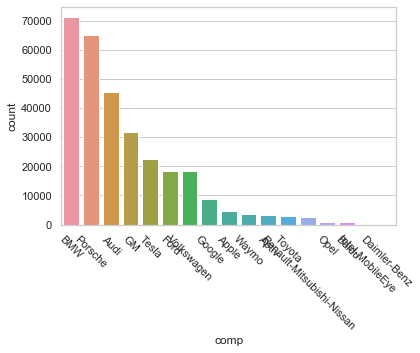

In [94]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="comp", y="count", data=df_plot)
# Rotate x-labels
plt.xticks(rotation=-45)

### better and clear plot

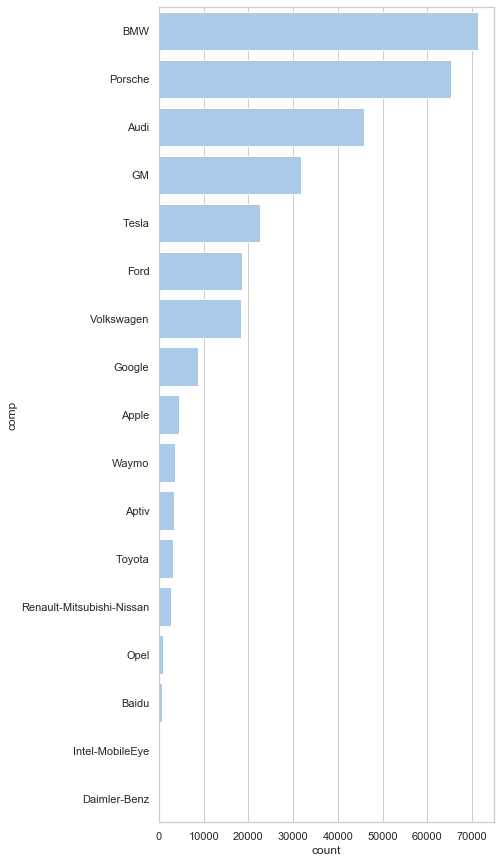

In [95]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="count", y="comp", data=df_plot,
            label="Tweet-Count", color="b")

# 4)-stacking all variables into one columnn

In [96]:
l.columns

Index(['TEXT', 'UTC DATE', 'month', 'year', 'Google', 'google', 'tesla', 'gm',
       'apple', 'ford', 'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche',
       'opel', 'waymo', 'aptiv', 'intel', 'baidu', 'toyota', 'renault',
       'mitsubishi', 'nissan'],
      dtype='object')

In [97]:
df=l[['google','tesla','gm']]

In [98]:
df.shape

(455727, 3)

In [99]:
df.head()

,google,tesla,gm
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [100]:
df_stack= df.unstack()

In [101]:
df_stack

google  1         0
        2         0
        3         0
        4         0
        5         0
                 ..
gm      455723    0
        455724    0
        455725    0
        455726    0
        455727    0
Length: 1367181, dtype: int64

In [102]:
df_stack.shape

(1367181,)

In [103]:
pd.DataFrame(df_stack).head(10)

0
google 1   0
       2   0
       3   0
       4   0
       5   0
       6   0
       7   0
       8   0
       9   0
       10  0

In [104]:
combined=pd.DataFrame(df_stack,columns=['label'])

In [105]:
combined.shape

(1367181, 1)

# 5)- NEXT STEPS

# CLEANING DATA

In [106]:
l=pd.read_csv('entity_data.csv')
l.shape

(455728, 2)

In [107]:
label=l[['TEXT']]

In [108]:
label=label.drop(l.index[0])

In [109]:
label.head()

,TEXT
1,"Another reason I failed in love is I'm poor,I ..."
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...
3,"Happy birthday to the Audi chasing maniac, hop..."
4,Come see Mercedes Benz stadium in Atlanta...
5,Italy took Cristiano and ever since then they’...


In [110]:
label.to_pickle('unclean_data.pkl')
label.to_csv('unclean_data.csv',index=False)

In [111]:
k=pd.read_csv('unclean_data.csv')
k.shape

(455727, 1)

### save data for cleaning purpose

# LABELING SMALL DATA FOR TRAINING

In [112]:
label_df=label.sample(20)

In [113]:
label_df.shape

(20, 1)

In [114]:
label_df[:5]

,TEXT
345294,Volkswagen CEO says sees case for building own...
247142,Win YOURSELF a FREE A FABULOUS VW SWEATSUIT! C...
54659,Here's Why General Motors Will Build and Test ...
129850,Volkswagen Drops Five Concepts in Georgia: htt...
427878,Take a restaurant near the General Motors offi...


### saving data 

In [115]:
label_df.to_pickle('label_data.pkl')
label_df.to_csv('label_data.csv',index=False)

In [116]:
g=pd.read_csv('label_data.csv')
g.shape

(20, 1)

In [117]:
g.head()

,TEXT
0,Volkswagen CEO says sees case for building own...
1,Win YOURSELF a FREE A FABULOUS VW SWEATSUIT! C...
2,Here's Why General Motors Will Build and Test ...
3,Volkswagen Drops Five Concepts in Georgia: htt...
4,Take a restaurant near the General Motors offi...


# SELECTING RANDOM DATA FOR TRAINING

choosing 6943 random samples out of total data for training purpose.

- For descriptive analysis, we shall use full dataset.

In [118]:
big_label=pd.read_csv('unclean_data.csv')
big_label.shape

(455727, 1)

In [119]:
big_label.head()

,TEXT
0,"Another reason I failed in love is I'm poor,I ..."
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...
2,"Happy birthday to the Audi chasing maniac, hop..."
3,Come see Mercedes Benz stadium in Atlanta...
4,Italy took Cristiano and ever since then they’...


In [120]:
big_label_df=big_label.sample(6943)

In [121]:
big_label_df.head()

,TEXT
6705,I hope my self-driving car can pay its own car...
53763,U.S. states could not set self-driving car rul...
335397,[P] Donkey: minimalist & modular self-driving ...
140335,"According to #cmuece's Rajkumar, winter weathe..."
105882,Tesla Motors Inc. investors dumped shares a da...


In [122]:
big_label_df.shape

(6943, 1)

### save data

In [123]:
big_label_df.to_pickle('train.pkl')
big_label_df.to_csv('train.csv',index=False)

In [124]:
j=pd.read_csv('train.csv')
j.shape

(6943, 1)

In [125]:
j.head()

,TEXT
0,I hope my self-driving car can pay its own car...
1,U.S. states could not set self-driving car rul...
2,[P] Donkey: minimalist & modular self-driving ...
3,"According to #cmuece's Rajkumar, winter weathe..."
4,Tesla Motors Inc. investors dumped shares a da...


# END OF NOTEBOOK